# Polynomial Regression Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221


## Train/Test split using numpy

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [6]:
print(train.shape, test.shape)

(854, 4) (213, 4)


## Model degree = 2

In [7]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(train_x_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.coef_

array([[ 0.        , 52.09890743, -1.68198851]])

In [12]:
lr.intercept_

array([104.33832957])

## Model visualization

Text(0, 0.5, 'Emission')

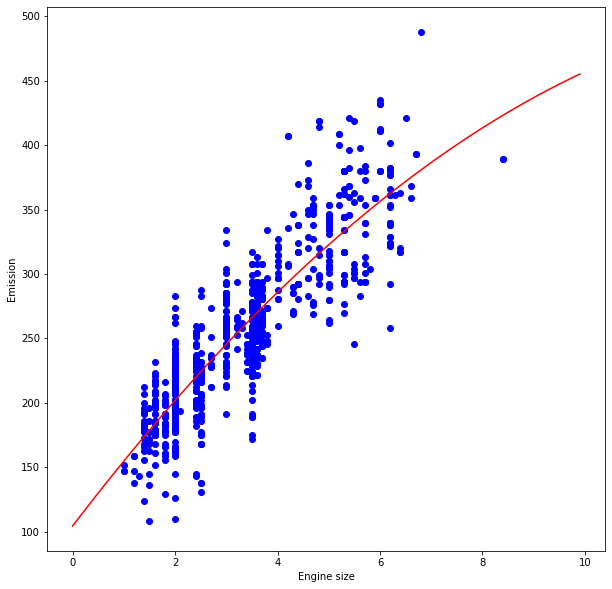

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model Evaluation

In [14]:
test_x_poly = poly.fit_transform(test_x)
test_x_poly

array([[ 1.  ,  3.7 , 13.69],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  5.2 , 27.04],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  6.  , 36.  ],
       [ 1.  ,  6.8 , 46.24],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  6.  , 36.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  3.6 , 12.96],
       [ 1

In [15]:
#R^2
lr.score(test_x_poly, test_y)

0.7625236718627844

In [16]:
yhat = lr.predict(test_x_poly)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Mean square error
mse = mean_squared_error(test_y, yhat)
print(mse)

936.8151110775196


## Model degree = 3

In [19]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
train_x_poly3

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [20]:
lr.fit(train_x_poly3, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lr.coef_

array([[ 0.        , 25.09151749,  5.74852493, -0.6146458 ]])

In [22]:
lr.intercept_

array([133.03192658])

## Model visualization

Text(0, 0.5, 'Emission')

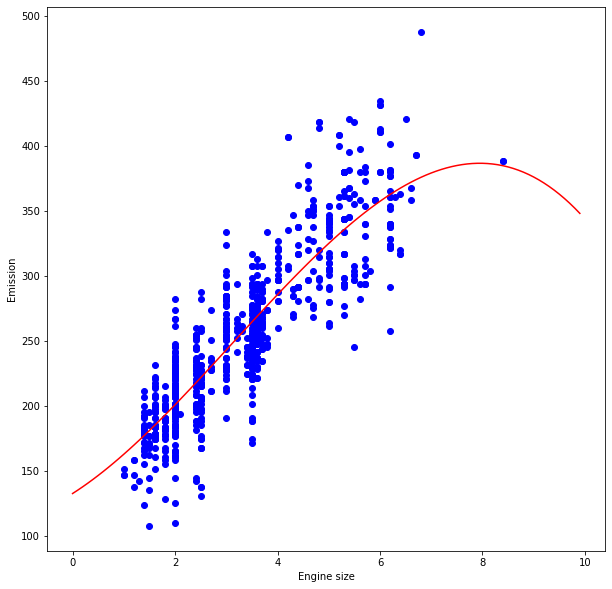

In [23]:
plt.figure(figsize=(10, 10))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)+ lr.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model evaluation

In [24]:
test_x_poly3 = poly3.fit_transform(test_x)
test_x_poly3

array([[  1.   ,   3.7  ,  13.69 ,  50.653],
       [  1.   ,   2.4  ,   5.76 ,  13.824],
       [  1.   ,   2.4  ,   5.76 ,  13.824],
       [  1.   ,   4.7  ,  22.09 , 103.823],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   5.2  ,  27.04 , 140.608],
       [  1.   ,   4.2  ,  17.64 ,  74.088],
       [  1.   ,   4.   ,  16.   ,  64.   ],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   6.   ,  36.   , 216.   ],
       [  1.   ,   6.8  ,  46.24 , 314.432],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   4.4  ,  19.36 ,  85.184],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  

In [29]:
#R^2
lr.score(test_x_poly3, test_y)

0.7599453102187163

In [26]:
yhat1 = lr.predict(test_x_poly3)

In [30]:
#Mean squared error
mse = mean_squared_error(test_y, yhat1)
print(mse)

946.9864328632849
